<a href="https://colab.research.google.com/github/SiddhantV369/predictive-modelling/blob/main/MultiModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from sklearn.datasets import load_iris,load_breast_cancer
import pandas as pd

data=load_breast_cancer().data
targets=load_breast_cancer().target


In [89]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

scaled_data = minmax_scale(data)
X=pd.DataFrame(scaled_data)
y=pd.Series(targets)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)


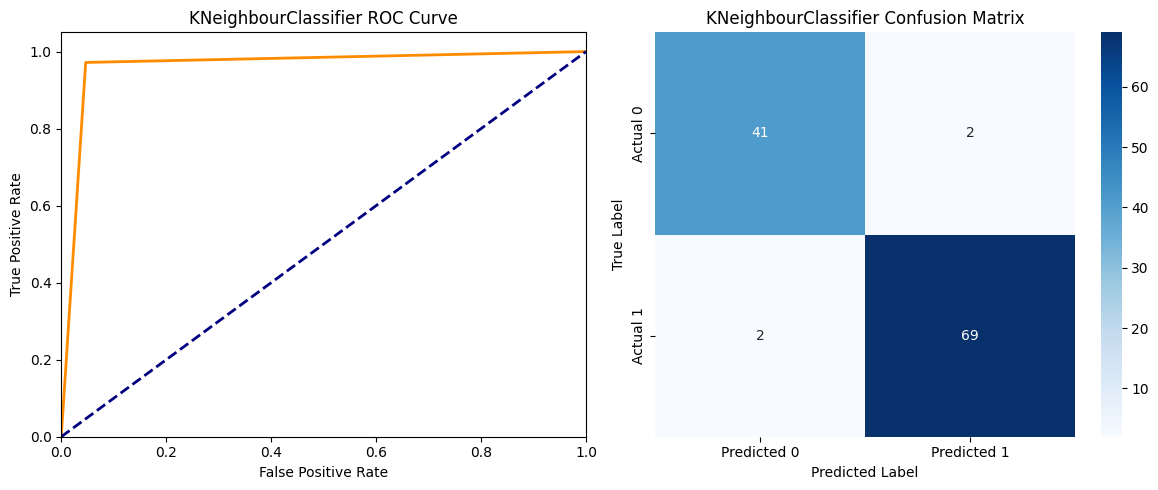

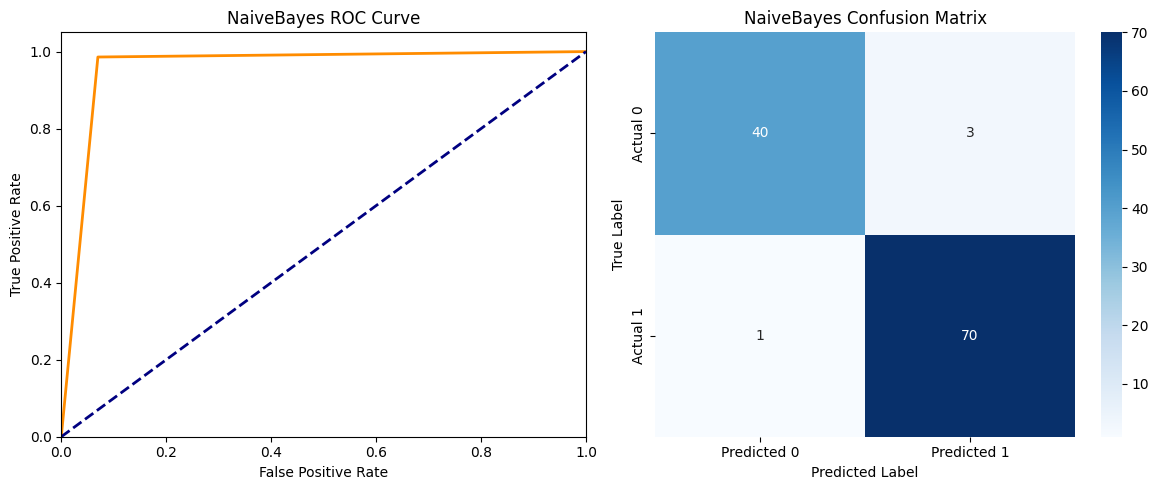

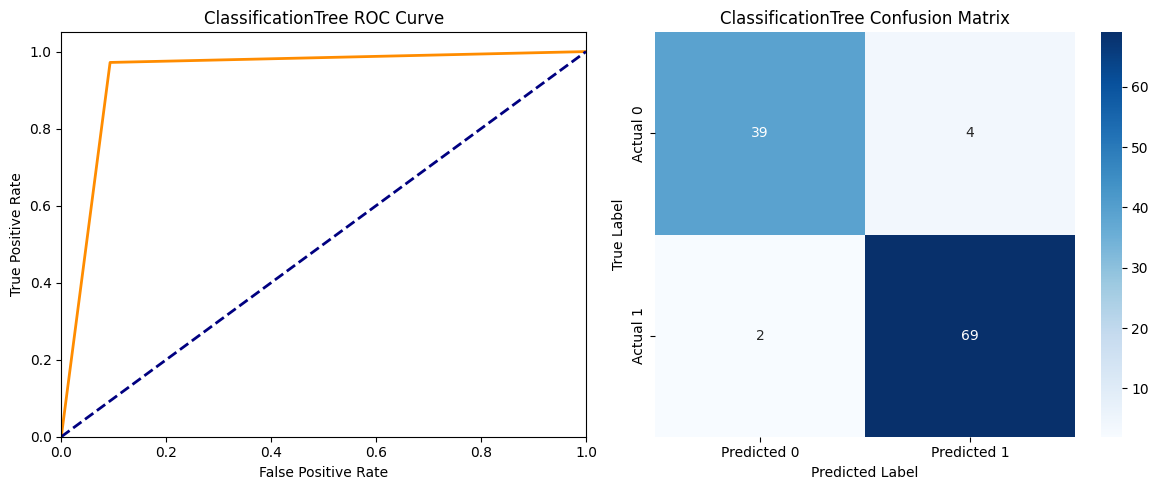

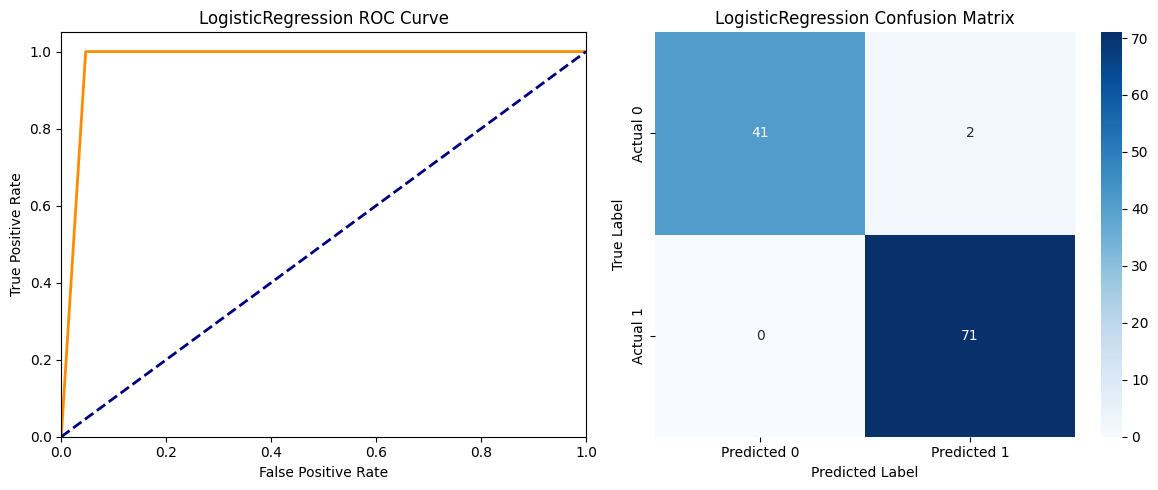

,KNeighbourClassifier,NaiveBayes,ClassificationTree,LogisticRegression
accuracy,0.964912,0.964912,0.947368,0.982456
precision,0.953488,0.930233,0.906977,0.953488
recall,0.953488,0.975610,0.951220,1.000000
f1-score,0.953488,0.952381,0.928571,0.976190
auc-score,0.962660,0.958074,0.939404,0.976744


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,roc_curve,auc

models={}
models['KNeighbourClassifier']={"model":KNeighborsClassifier(n_neighbors=5)}
models['NaiveBayes']={"model":GaussianNB()}
models['ClassificationTree']={"model":DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)}
models['LogisticRegression']={"model":LogisticRegression()}

def model_train(models,xtrain,xtest,ytrain,ytest):
  results={}
  for model_name,model_info in models.items():
    model_info["model"].fit(xtrain,ytrain)
    ypred=model_info["model"].predict(xtest)

    results[model_name]=model_evaluation(model_name,ytest,ypred)
    print()
  # plt.show() # Removed plt.show() from here
  return(pd.DataFrame(results))

def plot_rotc(ax,name,fpr,tpr):
  ax.set_title(name + " ROC Curve")
  ax.plot(fpr, tpr, color='darkorange', lw=2)
  ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')


def plot_confusion_matrix(ax, cfm, model_name):
    sns.heatmap(cfm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')


def model_evaluation(name,ytest,ypred):
  accuracy=(ytest==ypred).sum()/len(ytest)
  cfm=confusion_matrix(ytest,ypred)
  precision=cfm[0][0]/(cfm[0][0]+cfm[0][1])
  recall=cfm[0][0]/(cfm[0][0]+cfm[1][0])
  f1=2 * (precision * recall) / (precision + recall)
  fpr, tpr, _ = roc_curve(ytest,ypred)
  roc_auc = auc(fpr, tpr)

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  plot_rotc(axes[0], name,fpr,tpr)
  plot_confusion_matrix(axes[1], cfm,name)
  plt.tight_layout()
  plt.show()


  return {"accuracy":accuracy,
          "precision":precision,
          "recall":recall,
          "f1-score":f1,"auc-score":roc_auc}

res=model_train(models,xtrain,xtest,ytrain,ytest)
res